# Summer Datathon baseline 1:

In [31]:
# import libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn dependencies
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

## Load the dataset

In [32]:
# read the dataset 
df=pd.read_csv('internal_testing_sample.csv')

In [33]:
df.head(10)

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,target
0,cc4a30b284b3a41bb12860b727fcb016,2 years,60 months,0.0,4th week,TN,39500.0,INDIVIDUAL,BAT6004464,0.0,...,D3,Debt consolidation,0.0,41840.0,176.70,0.0,26100.0,Source Verified,370xx,25.0
1,0c507dc608992b4786d582af707f320a,1 year,36 months,0.0,31th week,NJ,65000.0,INDIVIDUAL,BAT422167,0.0,...,B4,Debt consolidation,0.0,52364.0,291.41,0.0,3300.0,Not Verified,070xx,24.0
2,53e3542cea6599e002b6971a1515423d,5 years,36 months,0.0,26th week,CA,40000.0,INDIVIDUAL,,0.0,...,B4,Debt consolidation,0.0,23942.0,357.43,0.0,23500.0,Source Verified,921xx,26.0
3,4a70a2a428fa315c22eecfc4d7e1eec6,10+ years,60 months,0.0,87th week,IL,108000.0,INDIVIDUAL,,0.0,...,D3,Debt consolidation,0.0,163168.0,5842.12,0.0,54700.0,Not Verified,601xx,30.0
4,5bae16ab57a152d59d5e93b78f67179f,4 years,60 months,0.0,26th week,CA,280000.0,INDIVIDUAL,NaN,0.0,...,D5,Credit card refinancing,0.0,1143160.0,3007.60,0.0,203200.0,Verified,913xx,36.0
5,fdf8bde95c17de8c33b91e88f492dd38,9 years,60 months,0.0,143th week,NJ,47000.0,INDIVIDUAL,,0.0,...,C5,Debt Relief,0.0,15275.0,6850.19,0.0,9600.0,Verified,080xx,21.0
6,90b42960d84ee2d1924e4fb28858417c,8 years,60 months,0.0,17th week,NY,73000.0,INDIVIDUAL,BAT4271519,0.0,...,C3,Debt consolidation,0.0,356280.0,654.64,0.0,11400.0,Not Verified,112xx,18.0
7,d3e403e4a7d1bb0029f77f3c68ba5220,10+ years,36 months,0.0,48th week,FL,83000.0,INDIVIDUAL,BAT4694572,0.0,...,A5,Credit card refinancing,0.0,346798.0,521.55,0.0,36300.0,Not Verified,330xx,42.0
8,d74700cd0aaa619e87c4b533048f111b,6 years,36 months,0.0,9th week,VA,104000.0,INDIVIDUAL,BAT2252229,0.0,...,B1,Credit card refinancing,0.0,60364.0,125.57,0.0,51600.0,Not Verified,223xx,18.0
9,759426d65bd5bd84dcfad7d3c242333a,4 years,36 months,0.0,91th week,KS,75800.0,INDIVIDUAL,BAT2522922,0.0,...,C1,Debt consolidation,0.0,138515.0,2607.29,0.0,17400.0,Source Verified,674xx,30.0


Let's get some information about the dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5000 non-null   object 
 1   time        4736 non-null   object 
 2   duration    5000 non-null   object 
 3   feature_0   5000 non-null   float64
 4   checkpoint  5000 non-null   object 
 5   feature_1   5000 non-null   object 
 6   feature_2   5000 non-null   float64
 7   feature_3   5000 non-null   object 
 8   feature_4   4257 non-null   object 
 9   feature_5   5000 non-null   float64
 10  feature_6   5000 non-null   float64
 11  feature_7   5000 non-null   float64
 12  feature_8   5000 non-null   float64
 13  feature_9   4719 non-null   object 
 14  feature_10  5000 non-null   int64  
 15  feature_11  5000 non-null   float64
 16  feature_12  5000 non-null   object 
 17  feature_13  5000 non-null   object 
 18  feature_14  5000 non-null   object 
 19  feature_15  5000 non-null  

In [35]:
df.describe()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,feature_22,feature_25,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,4999.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.0000,5000.000000
mean,0.006600,75776.499826,4.424631,0.015800,0.347800,18.614870,15086.675000,15080.808718,0.685400,13.255902,...,0.20720,39.502424,17445.518200,55.549290,251.922200,1.400143e+05,1693.410364,0.319930,32178.9484,25.592800
std,0.085778,49631.067252,51.810279,0.139837,0.909176,8.364585,8376.989054,8373.932511,0.991274,4.366022,...,0.58612,347.598125,21813.808946,23.539859,4612.687939,1.583718e+05,1962.287621,3.455583,31092.0058,11.896356
min,0.000000,7067.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,0.000000,5.320000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,200.0000,3.000000
25%,0.000000,47000.000000,0.000000,0.000000,0.000000,12.397500,8500.000000,8500.000000,0.000000,9.990000,...,0.00000,0.000000,6813.250000,38.800000,0.000000,3.006750e+04,415.745000,0.000000,14400.0000,17.000000
50%,0.000000,65000.000000,0.000000,0.000000,0.000000,18.160000,14000.000000,13987.500000,0.000000,12.990000,...,0.00000,0.000000,12421.000000,56.700000,0.000000,7.835200e+04,1070.385000,0.000000,24200.0000,24.000000
75%,0.000000,90000.000000,0.000000,0.000000,0.000000,24.450000,20000.000000,20000.000000,1.000000,16.200000,...,0.00000,0.000000,21108.750000,73.600000,0.000000,2.051655e+05,2206.487500,0.000000,39900.0000,32.000000
max,2.000000,900000.000000,1097.622000,4.000000,12.000000,39.970000,35000.000000,35000.000000,6.000000,28.490000,...,13.00000,6097.900000,544178.000000,112.500000,296368.000000,2.552960e+06,19709.430000,93.580000,555500.0000,92.000000


## A little bit of EDA 

What is in the `checkpoint` column?

In [36]:
df.checkpoint.unique()

array(['4th week', '31th week', '26th week', '87th week', '143th week',
       '17th week', '48th week', '9th week', '91th week', 'NAth week',
       '148th week', '22th week', '43th week', '131th week', '56th week',
       '69th week', '104th week', '13th week', '61th week', '44th week',
       '83th week', '74th week', '109th week', '65th week', '35th week',
       '70th week', '52th week', '122th week', '18th week', '100th week',
       '30th week', '135th week', '156th week', '39th week', '82th week',
       '57th week', '78th week', '126th week', '96th week', '117th week',
       '113th week', '152th week', '144th week', '139th week',
       '95th week', '21th week', '161th week', '130th week', '121th week',
       '174th week', '108th week', '0th week', '8th week', '165th week',
       '170th week'], dtype=object)

What about the `duration` column?

In [37]:
df.duration.unique()

array(['60 months', '36 months'], dtype=object)

`Time` column

In [38]:
df.time.unique()

array(['2 years', '1 year', '5 years', '10+ years', '4 years', '9 years',
       '8 years', '6 years', '3 years', '7 years', nan, '< 1 year'],
      dtype=object)

There are some categorical variables in the anonymized features. Let's see what unique values these columns have.

In [39]:
col_names=list(df.columns)

In [40]:
feats=[i for i in col_names if re.search("^feature",i)]

In [41]:
for i in feats:
    if len(df[i].unique())<100:
        print(f"Unique values in column `{i}`: --- {df[i].unique()}")

Unique values in column `feature_0`: --- [0. 1. 2.]
Unique values in column `feature_1`: --- ['TN' 'NJ' 'CA' 'IL' 'NY' 'FL' 'VA' 'KS' 'RI' 'AR' 'WI' 'CO' 'OH' 'CT'
 'MD' 'LA' 'AZ' 'KY' 'PA' 'NV' 'MI' 'OR' 'MA' 'GA' 'IN' 'AK' 'WA' 'MN'
 'NC' 'AL' 'TX' 'UT' 'SC' 'MO' 'WV' 'DE' 'WY' 'NM' 'OK' 'HI' 'MS' 'MT'
 'NH' 'SD' 'DC' 'ND' 'NE' 'VT' 'ME']
Unique values in column `feature_3`: --- ['INDIVIDUAL' 'JOINT']
Unique values in column `feature_4`: --- ['BAT6004464' 'BAT422167' ' ' nan 'BAT4271519' 'BAT4694572' 'BAT2252229'
 'BAT2522922' 'BAT5046402' 'BAT1780517' 'BAT4106493' 'BAT2833642'
 'BAT2558388' 'BAT5924421' 'BAT3563724' 'BAT3726927' 'BAT4127326'
 'BAT3404765' 'BAT5349407' 'BAT6612051' 'BAT4711174' 'BAT5662637'
 'BAT2803411' 'BAT4818662' 'BAT1586599' 'BAT1184694' 'BAT2333412'
 'BAT4351734' 'BAT4808022' 'BAT5260863' 'BAT224923' 'BAT2136391'
 'BAT4136152' 'BAT3840785' 'BAT2078974' 'BAT3274746' 'BAT3193689'
 'BAT1104812' 'BAT338166' 'BAT4408664' 'BAT4722912' 'BAT528686'
 'BAT4268557' 'BAT38

On retrospect, there is one more categorical variable.

In [42]:
df.feature_9.unique()

array(['Delivery driver/merchandiser', 'IT Desktop Engineer',
       'parts driver', ..., 'Maintenance Sgt', 'Surgical Asst.', 'CNUSD'],
      dtype=object)

Feature 9 seems to be representing something like profession of a person. Do we need that? 

In [43]:
len(df.feature_9.unique())

3245

And... `feature_29` seems to be a text column. Let's keep that out for this version.

In [44]:
df.feature_29.unique()

array(['Debt consolidation', 'Credit card refinancing', 'Debt Relief',
       'lower debt/taxes due', 'Home buying', 'Life Happens',
       'Debt Consolidation', 'Medical expenses', 'discover',
       'debt cosolidation', 'Home improvement', 'Other', 'Discover',
       'Credit Card Consolidation', 'Major purchase',
       'Get Out of Debt Sooner!!!', 'Acute needs', 'Business',
       'Consolidate', 'Home Remodeling', 'New Loan', 'consalidation',
       'Credit card payoff', 'Consolidation', 'Credit Card Debt',
       '$$$Great Choice$$$', 'My Loan', 'Vacation', 'card refinance',
       'debt consolidation', 'debt payoff',
       'Lower Interest Debt Consolidation', 'Dental', 'Credit Refinance',
       'Debt free', 'Cc loan', 'Combining credit', 'Bills',
       'Consolidate 3 CCs', 'Debt Consildation', 'debt relief',
       'Debt Relief Loan', 'cc refi', 'Home Improvement', 'Debt Free',
       'Vacation Loan', 'bill free', 'paypeskycards',
       'Moving and relocation', 'Pool', 'Debt F

Finally, there is feature 36, and it seems to be capturing something. Seems like postal code.

In [45]:
df.feature_36.unique()[:10]

array(['370xx', '070xx', '921xx', '601xx', '913xx', '080xx', '112xx',
       '330xx', '223xx', '674xx'], dtype=object)

From the above output, we can see that the following features are categorical among the anonymized features:
- feature_0
- feature_1
- feature_3
- feature_4
- feature_7
- feature_9
- feature_12
- feature_13
- feature_14
- feature_15
- feature_23
- feature_28
- feature_35
- feature_36

And, we should probably drop `feature_24` since it has only one value.

`feature_29` and `feature_9` are text columns that need to be handled differently. We can probably take them out too. Atleast for this version.

In [46]:
# some extra columns to remove from the data right now 
df.drop(columns=['feature_29','feature_24','feature_9'],inplace=True)

Ok, moving on...

In [47]:
# categorical columns
cat_cols= ['feature_0', 'feature_1', 'feature_3', 
           'feature_4', 'feature_7',
           'feature_12', 'feature_13', 'feature_14',
           'feature_15', 'feature_23',
           'feature_28', 'feature_35','feature_36'
          ]

# ordinal columns
encode_cols=['time','duration','checkpoint']

# numerical columns
remove=cat_cols+encode_cols + ['id','target', 'feature_24', 'feature_29','feature_9']
num_cols=[i for i in col_names if i not in remove]

Can we do a correlation matrix for the numerical columns?

<Axes: >

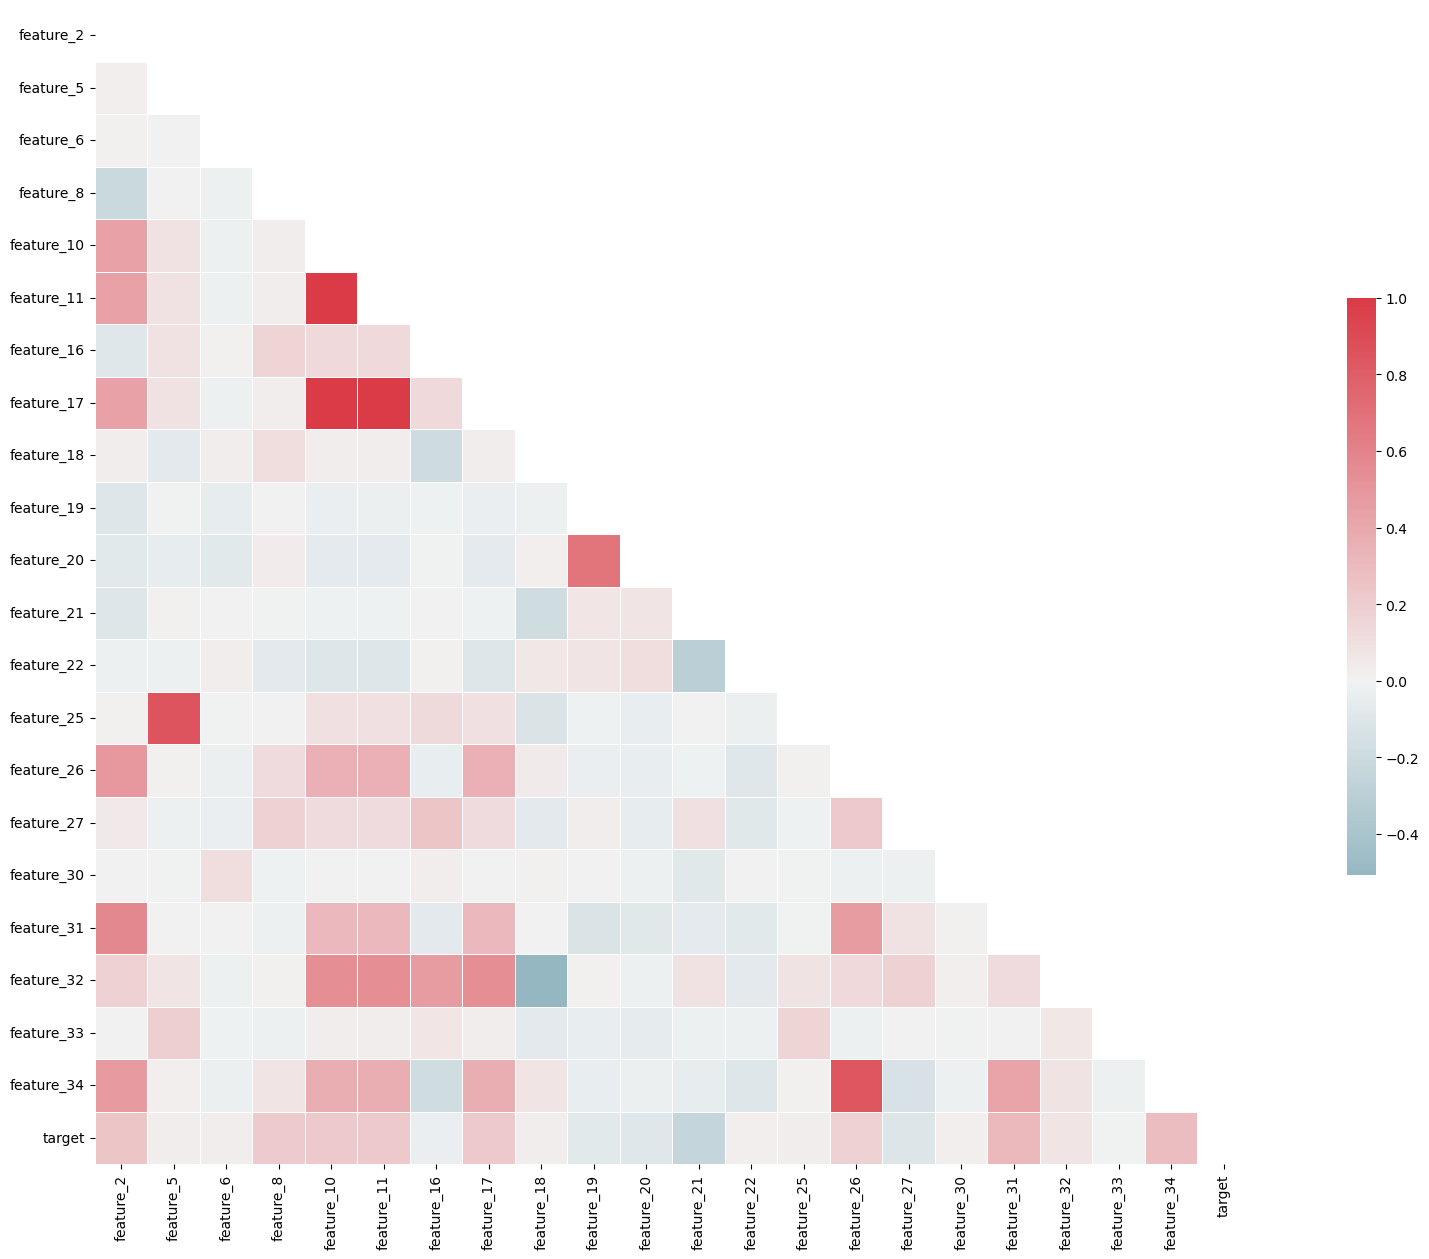

In [48]:
# calculate correlation
corr=df[num_cols + ['target']].corr()

mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax=plt.subplots(figsize=(25,15))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

What if we set a threshold for correlation values and select columns which have correlation higher than the target.

In [49]:
threshold=0.5 # threshold for correlation
k={} #empty dictionary

for i in corr.columns:
    corr_dict=corr[i].to_dict()
    for j in corr_dict:
        if threshold<=corr_dict[j]<1: #correlation is greater than threshold
            k[corr_dict[j]]=sorted((i,j))

We can look out for columns that are highly correlated to each other because they can introduce multicollinearity in the model 

In [50]:
{i:j for i,j in k.items() if 'target' not in j}

{0.5703402267554034: ['feature_2', 'feature_31'],
 0.8477650902209051: ['feature_25', 'feature_5'],
 0.9999948803277826: ['feature_11', 'feature_17'],
 0.5317717042668566: ['feature_17', 'feature_32'],
 0.5316635564138348: ['feature_11', 'feature_32'],
 0.679880830934263: ['feature_19', 'feature_20'],
 0.8463135043251175: ['feature_26', 'feature_34']}

In [51]:
to_remove=['feature_17','feature_25','feature_26','feature_19']
num_cols=[i for i in num_cols if i not in to_remove]

So, there is a lot of useful information in the above correlation plot. For now, I'll just ignore it all. We can use this information in the second baseline and later versions. Let's focus on getting a primary model up and running.

But before that, let's try one more visualization.

In [52]:
# commented out to speed up reruns 
# sns.pairplot(df[num_cols])

We'll refine that plot later.

## Data Preprocessing

### Categorical columns

In [53]:
# preprocessing pipeline for categorical variables
cat_pipeline=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encode",OneHotEncoder(dtype='int', handle_unknown='ignore')),
                             ])

### Ordinal columns

In [54]:
# preprocessing pipeline for categorical variables
encode_pipeline=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encode",OrdinalEncoder(dtype='int', handle_unknown='use_encoded_value',unknown_value=-1)),
                             ])

### Numerical columns

In [55]:
# preprocessing pipeline for numerical variables
num_pipeline=Pipeline(steps=[
    ("imputer",SimpleImputer(missing_values=np.nan, strategy='mean')),
    ("scale",StandardScaler())
                              ])

### Put it together

In [56]:
X=df.drop(columns=['id','target'])
y=df.target

# make the column transformer
column_trans = make_column_transformer(
    (cat_pipeline, cat_cols),
    (encode_pipeline, encode_cols),
    (num_pipeline, num_cols),
    )

# fit on training data
X=column_trans.fit_transform(X)

### Splitting the data

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

## Model building and evaluation

Since this is a regression problem, one of the obvious choices for the baseline model is a lasso regression model. 

In [58]:
lr=Lasso()
lr.fit(X_train,y_train)

Lasso()

MSLE 

In [59]:
y_pred=lr.predict(X_valid)
print(f"MSLE:{mean_squared_log_error(y_valid, y_pred, squared=False)}")

MSLE:0.4262888252493797


Let's get a R2 score as well

In [60]:
y_pred=lr.predict(X_valid)
print(f"R2:{r2_score(y_valid, y_pred)}")

R2:0.18523597448446005
